In [5]:
import os
from datasets.dataset_generic import Generic_WSI_Classification_Dataset, Generic_MIL_Dataset
from utils.utils import *

# pytorch imports
import torch
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

exp_code='LUSC_vs_LUAD_CLAM_100_task2_mb'
data_root_dir='/shared/js.yun/data/CLAM_data/'
feature_folder='TCGA-lung-features'
results_dir='/shared/js.yun/logs/CLAM/TCGA-lung-results/'
split_dir='/shared/js.yun/data/CLAM_data/TCGA-lung-splits/task_2_tumor_subtyping_100/'
csv_path='/shared/js.yun/CLAM/dataset_csv/TCGA-lung.csv'
label_dict={"LUSC":0,"LUAD":1}

seed=1
fold=0
testing=False
weighted_sample=False

In [6]:
def seed_torch(seed=7):
    import random
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if device.type == 'cuda':
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

seed_torch()

In [7]:
def plot_features(features, labels, num_classes):
    """Plot features on 2D plane.
    Args:
        features: (num_instances, num_features).
        labels: (num_instances).
    """
    colors = ['C0', 'C1']
    for label_idx in range(num_classes):
        plt.scatter(
            features[labels == label_idx, 0],
            features[labels == label_idx, 1],
            c=colors[label_idx],
            s=1,
        )
    plt.legend(['0', '1'], loc='upper right')
    # dirname = osp.join(args.save_dir, prefix)
    # if not osp.exists(dirname):
    #     os.mkdir(dirname)
    # save_name = osp.join(dirname, 'epoch_' + str(epoch + 1) + '.png')
    # plt.savefig(save_name, bbox_inches='tight')
    plt.show()
    # plt.close()



In [8]:
def plot_features2(features, labels, num_classes):
    """Plot features on 2D plane.
    Args:
        features: (num_instances, num_features).
        labels: (num_instances).
    """
    fig = plt.scatter(features, labels, color=labels, title='t-SNE 2D Reduction of CIFAR10 Dataset Mutually-Orthogonal Class Feature Vectors [512x1]')
    plt.show()

# plot_features2(model, label, 2)

# LUNG

In [9]:
dataset = Generic_MIL_Dataset(csv_path=csv_path,
                            data_dir=os.path.join(data_root_dir, feature_folder),
                            shuffle = False, 
                            seed = seed, 
                            print_info = True,
                            label_dict = label_dict,
                            patient_strat= False,
                            ignore=[])

label column: label
label dictionary: {'LUSC': 0, 'LUAD': 1}
number of classes: 2
slide-level counts:  
 0    512
1    540
Name: label, dtype: int64
Patient-LVL; Number of samples registered in class 0: 512
Slide-LVL; Number of samples registered in class 0: 512
Patient-LVL; Number of samples registered in class 1: 540
Slide-LVL; Number of samples registered in class 1: 540


In [10]:
train_dataset, val_dataset, test_dataset = dataset.return_splits(from_id=False, 
                csv_path='{}/splits_{}.csv'.format(split_dir, fold))

datasets = (train_dataset, val_dataset, test_dataset)
train_split, val_split, test_split = datasets
print("Training set {} samples".format(len(train_split)))
train_loader = get_split_loader(train_split, training=True, testing = testing, weighted = weighted_sample)

Training set 842 samples


In [11]:
patch_per_slide = 10000
num_slide = 10

data, label = next(iter(train_loader))
data = data[:patch_per_slide]
label = torch.Tensor([label]*patch_per_slide)
print(data.size())
print(label.size())
for i in range(num_slide):
    data1, label1 = next(iter(train_loader))
    data1 = data1[:patch_per_slide]
    label1 = torch.Tensor([label1]*patch_per_slide)
    # print(data1.size())
    # print(label1)
    data = torch.cat([data, data1], dim=0)
    label = torch.cat([label, label1], dim=0)
    print(data.size())
    print(label.size())

torch.Size([10000, 1024])
torch.Size([10000])
torch.Size([20000, 1024])
torch.Size([20000])
torch.Size([30000, 1024])
torch.Size([30000])
torch.Size([40000, 1024])
torch.Size([40000])
torch.Size([50000, 1024])
torch.Size([50000])
torch.Size([60000, 1024])
torch.Size([60000])
torch.Size([70000, 1024])
torch.Size([70000])
torch.Size([80000, 1024])
torch.Size([80000])
torch.Size([90000, 1024])
torch.Size([90000])
torch.Size([100000, 1024])
torch.Size([100000])
torch.Size([110000, 1024])
torch.Size([110000])


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


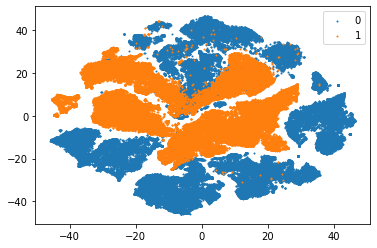

In [12]:
model = TSNE(n_components=2).fit_transform(data)
plot_features(model, label, 2)

# BREAST

In [3]:
exp_code='task_2_tumor_typing_only_major_two_CLAM_100'
data_root_dir='/shared/js.yun/data/CLAM_data/'
feature_folder='TCGA-breast-features'
results_dir='/shared/js.yun/logs/CLAM/TCGA-breast-results/'
split_dir='/shared/js.yun/data/CLAM_data/TCGA-breast-splits-tumor-major-two/task_2_tumor_subtyping_100/'
csv_path='/shared/js.yun/CLAM/dataset_csv/TCGA-breast-tumor-major-two.csv'
label_dict={"Infiltrating Ductal Carcinoma":0,"Infiltrating Lobular Carcinoma":1}

dataset = Generic_MIL_Dataset(csv_path=csv_path,
                            data_dir=os.path.join(data_root_dir, feature_folder),
                            shuffle = False, 
                            seed = seed, 
                            print_info = True,
                            label_dict = label_dict,
                            patient_strat= False,
                            ignore=[])

train_dataset, val_dataset, test_dataset = dataset.return_splits(from_id=False, 
                csv_path='{}/splits_{}.csv'.format(split_dir, fold))

datasets = (train_dataset, val_dataset, test_dataset)
train_split, val_split, test_split = datasets
print("Training set {} samples".format(len(train_split)))
train_loader = get_split_loader(train_split, training=True, testing = testing, weighted = weighted_sample)

label column: label
label dictionary: {'Infiltrating Ductal Carcinoma': 0, 'Infiltrating Lobular Carcinoma': 1}
number of classes: 2
slide-level counts:  
 0    797
1    204
Name: label, dtype: int64
Patient-LVL; Number of samples registered in class 0: 797
Slide-LVL; Number of samples registered in class 0: 797
Patient-LVL; Number of samples registered in class 1: 204
Slide-LVL; Number of samples registered in class 1: 204
Training set 801 samples


In [4]:
################################
patch_per_slide = 500
num_slide = 20
################################

data, label = next(iter(train_loader))
data = data[:patch_per_slide]
label = torch.Tensor([label]*patch_per_slide)
print(data.size())
print(label.size())
for i in range(num_slide):
    data1, label1 = next(iter(train_loader))
    data1 = data1[:patch_per_slide]
    label1 = torch.Tensor([label1]*len(data1))
    # print(data1.size())
    # print(label1)
    data = torch.cat([data, data1], dim=0)
    label = torch.cat([label, label1], dim=0)
    print(data.size())
    print(label.size())

torch.Size([500, 1024])
torch.Size([500])
torch.Size([1000, 1024])
torch.Size([1000])
torch.Size([1500, 1024])
torch.Size([1500])
torch.Size([2000, 1024])
torch.Size([2000])
torch.Size([2500, 1024])
torch.Size([2500])
torch.Size([3000, 1024])
torch.Size([3000])
torch.Size([3500, 1024])
torch.Size([3500])
torch.Size([4000, 1024])
torch.Size([4000])
torch.Size([4500, 1024])
torch.Size([4500])
torch.Size([5000, 1024])
torch.Size([5000])
torch.Size([5500, 1024])
torch.Size([5500])
torch.Size([6000, 1024])
torch.Size([6000])
torch.Size([6500, 1024])
torch.Size([6500])
torch.Size([7000, 1024])
torch.Size([7000])
torch.Size([7500, 1024])
torch.Size([7500])
torch.Size([8000, 1024])
torch.Size([8000])
torch.Size([8500, 1024])
torch.Size([8500])
torch.Size([9000, 1024])
torch.Size([9000])
torch.Size([9500, 1024])
torch.Size([9500])
torch.Size([10000, 1024])
torch.Size([10000])
torch.Size([10500, 1024])
torch.Size([10500])


In [5]:
model = TSNE(n_components=2).fit_transform(data)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


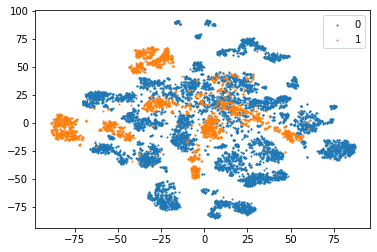

In [8]:
plot_features(model, label, 2)
# plot_features2(model, label, 2)